<a href="https://colab.research.google.com/github/vishnu08-p/calculater/blob/main/loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import opendatasets as od
import os
import plotly.express as px
import kagglehub

In [ ]:
url = pd.read_csv('/content/loan_data (1).csv.crdownload')

In [ ]:
url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [ ]:
url

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved
...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,employed,Approved
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,employed,Rejected
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,employed,Rejected
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,unemployed,Rejected


In [ ]:
url.columns

Index(['Text', 'Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio',
       'Employment_Status', 'Approval'],
      dtype='object')

In [ ]:
url.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [ ]:
loan = url[['Income', 'Credit_Score', 'Loan_Amount','Employment_Status', 'Approval']].copy()
# we only take this Columns To predict Data
print(loan)

       Income  Credit_Score  Loan_Amount Employment_Status  Approval
0       26556           581         8314          employed  Rejected
1      197392           389       111604          employed  Rejected
2       44561           523        34118          employed  Rejected
3      190363           729       118757        unemployed  Rejected
4       61853           732        19210          employed  Approved
...       ...           ...          ...               ...       ...
23995  195242           817        16403          employed  Approved
23996  150246           729       101572          employed  Rejected
23997   64571           650        30533          employed  Rejected
23998  115825           418        89837        unemployed  Rejected
23999  180440           769        15259          employed  Approved

[24000 rows x 5 columns]


In [ ]:
loan = loan.dropna(subset =['Income', 'Credit_Score', 'Loan_Amount','Employment_Status','Approval'])

In [ ]:
print(loan)

       Income  Credit_Score  Loan_Amount Employment_Status  Approval
0       26556           581         8314          employed  Rejected
1      197392           389       111604          employed  Rejected
2       44561           523        34118          employed  Rejected
3      190363           729       118757        unemployed  Rejected
4       61853           732        19210          employed  Approved
...       ...           ...          ...               ...       ...
23995  195242           817        16403          employed  Approved
23996  150246           729       101572          employed  Rejected
23997   64571           650        30533          employed  Rejected
23998  115825           418        89837        unemployed  Rejected
23999  180440           769        15259          employed  Approved

[24000 rows x 5 columns]


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Income             24000 non-null  int64 
 1   Credit_Score       24000 non-null  int64 
 2   Loan_Amount        24000 non-null  int64 
 3   Employment_Status  24000 non-null  object
 4   Approval           24000 non-null  object
dtypes: int64(3), object(2)
memory usage: 937.6+ KB


In [ ]:
loan.duplicated().sum()

np.int64(0)

In [ ]:
loan.describe()

,Income,Credit_Score,Loan_Amount
count,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833
std,51729.677627,159.227621,34666.604785
min,20001.000000,300.000000,1005.000000
25%,65635.750000,437.000000,16212.000000
50%,110464.000000,575.000000,35207.000000
75%,155187.000000,715.000000,65622.750000
max,200000.000000,850.000000,158834.000000


In [ ]:
url.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


In [ ]:
url['Employment_Status']=url['Employment_Status'].replace({'unemployed': 0, 'employed': 1}).astype(int)
url['Approval'] = url['Approval'].replace({'Rejected' :0, 'Approved':1}).astype(int)


<ipython-input-14-6a91f366842e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  url['Employment_Status']=url['Employment_Status'].replace({'unemployed': 0, 'employed': 1}).astype(int)
<ipython-input-14-6a91f366842e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  url['Approval'] = url['Approval'].replace({'Rejected' :0, 'Approved':1}).astype(int)


In [ ]:
url["Employment_Status"].value_counts()

,count
Employment_Status,
0,12007
1,11993


In [ ]:
url['Approval'].value_counts()

,count
Approval,
0,20067
1,3933


In [ ]:
print(url)

                                                    Text  Income  \
0      I need a loan to pay for an international vaca...   26556   
1      I want to make home improvements like installi...  197392   
2      I need a loan for home renovation, including a...   44561   
3      I need funds to buy new furniture and applianc...  190363   
4               I need a loan to start a small business.   61853   
...                                                  ...     ...   
23995  I need funds to pay for my daughter's college ...  195242   
23996  I need financial assistance to launch my own Y...  150246   
23997   I need money to open a small bookstore and café.   64571   
23998  I want to buy a car for my rideshare business ...  115825   
23999  I need financial help to cover maternity and d...  180440   

       Credit_Score  Loan_Amount  DTI_Ratio  Employment_Status  Approval  
0               581         8314      79.26                  1         0  
1               389       111604 

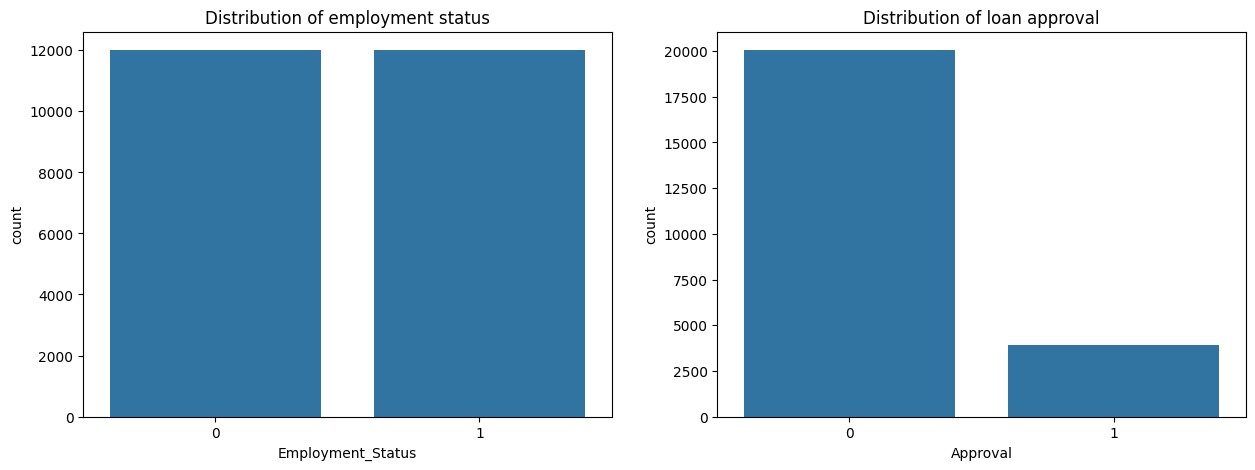

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='Employment_Status',data=url)
plt.title('Distribution of employment status')
plt.subplot(1,2,2)
sns.countplot(x='Approval',data=url)
plt.title('Distribution of loan approval')
plt.show()
plt.tight_layout()

In [ ]:
px.scatter(url,x='Income',y='Credit_Score',color='Approval')

In [ ]:
url.Approval.corr(url.Income)

np.float64(0.13557411364532523)

In [ ]:
url.Credit_Score.corr(url.Income)

np.float64(0.0012006631890043983)

In [ ]:
url.Credit_Score.corr(url.Loan_Amount)

np.float64(-0.006542386456560048)

In [ ]:
url.Income.corr(url.Approval)

np.float64(0.13557411364532523)

In [ ]:
url.Employment_Status.corr(url.Approval)

np.float64(0.44296976701668866)

In [ ]:
url.Credit_Score.corr(url.Approval)

np.float64(0.3516931254253872)

In [ ]:
#url.Income.corr(url.Approval)
url.Loan_Amount.corr(url.Approval)

np.float64(-0.08546713621377737)

In [ ]:
url

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,1,0
1,I want to make home improvements like installi...,197392,389,111604,22.14,1,0
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,1,0
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,0,0
4,I need a loan to start a small business.,61853,732,19210,44.13,1,1
...,...,...,...,...,...,...,...
23995,I need funds to pay for my daughter's college ...,195242,817,16403,24.32,1,1
23996,I need financial assistance to launch my own Y...,150246,729,101572,9.97,1,0
23997,I need money to open a small bookstore and café.,64571,650,30533,57.35,1,0
23998,I want to buy a car for my rideshare business ...,115825,418,89837,10.37,0,0


<Axes: xlabel='Income', ylabel='Credit_Score'>

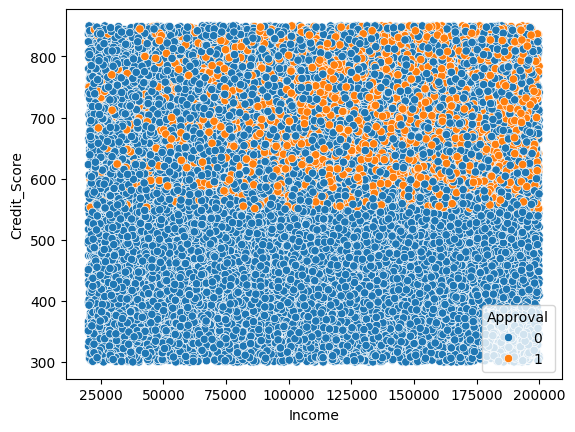

In [ ]:
sns.scatterplot(x='Income',y='Credit_Score',data=url,hue='Approval')

In [ ]:
def Approval(Income,w, b):
  return w*Income+b

In [ ]:
w = 50
b = 100

In [ ]:
def rmse (target, prediction):
  return np.sqrt(np.mean((target-prediction)))

In [ ]:
w = 50
b = 100

In [ ]:
targets = url['Approval']
predictrd = Approval(url['Income'],w,b)

In [ ]:
rmse(targets,predictrd)

<ipython-input-35-577fd1d34103>:2: RuntimeWarning:

invalid value encountered in sqrt



np.float64(nan)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression
model()

LinearRegression()

In [ ]:
inputs = url [[ "Income"]]
targets = url['Approval']
print("input.shapes", inputs.shape)
print("targets.shapes", targets.shape)

input.shapes (24000, 1)
targets.shapes (24000,)


In [ ]:
#model.fit(inputs, targets)
model = LinearRegression()
model.fit(inputs, targets)

LinearRegression()

In [ ]:
inputs


,Income
0,26556
1,197392
2,44561
3,190363
4,61853
...,...
23995,195242
23996,150246
23997,64571
23998,115825


In [ ]:
model.predict([[100499800],[135451],[52422.14]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([97.55647554,  0.18819996,  0.10764967])

In [ ]:
prediction = model.predict(inputs)
prediction

array([0.08255569, 0.24829189, 0.1000232 , ..., 0.11943586, 0.16915983,
       0.23184595])

In [ ]:
rmse(targets, prediction)

np.float64(2.193391538244448e-09)

In [ ]:
inputs, targets = url[['Income','Employment_Status']], url['Approval']
model = LinearRegression()
model.fit(inputs, targets)

LinearRegression()

In [ ]:
prediction = model.predict(inputs)
prediction

array([0.24528696, 0.41439252, 0.26310958, ..., 0.2829169 , 0.00507447,
       0.39761223])

<Axes: xlabel='Income', ylabel='Approval'>

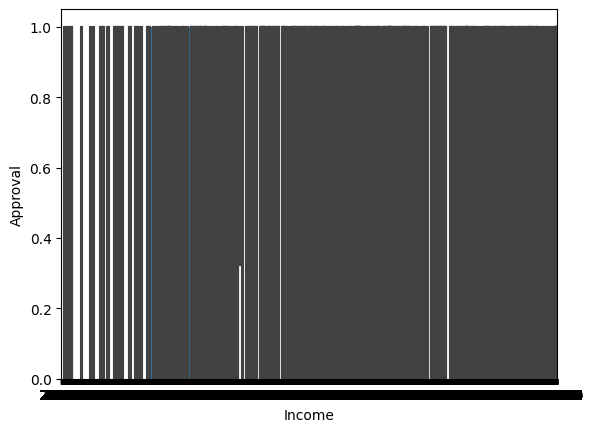

In [ ]:
sns.barplot(data= url, x='Income', y='Approval')

<Axes: xlabel='Employment_Status', ylabel='Approval'>

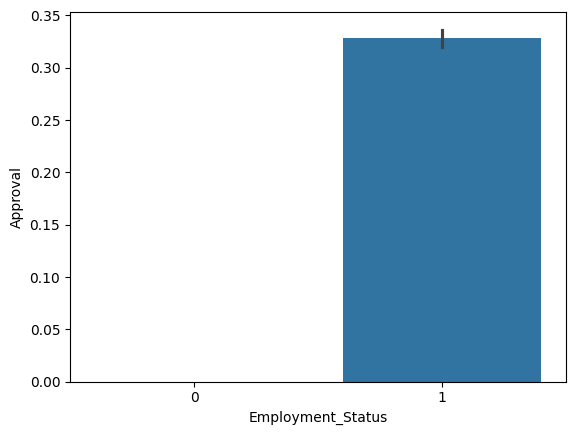

In [ ]:
sns.barplot(data= url, x='Employment_Status', y='Approval')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = url[['Income', 'Credit_Score', 'Loan_Amount', 'Employment_Status']]
y = url['Approval']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

Accuracy of the Decision Tree model: 0.9679166666666666


Here we can see that **decision tree runs good**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x = url[['Income', 'Credit_Score', 'Loan_Amount', 'Employment_Status']]
y = url['Approval']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

Accuracy of the Random Forest model: 0.973125


Now we can see that** Random forest** runs **Good** more than **Decision tree**